In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

In [3]:

def psi(x):
    return np.sin(2*x*np.pi)/(4*np.pi**2)+10*x+10

def search_max_lambda(A):
    a = np.ones(len(A))
    count = 0
    while(count < 50):
        tmp = A@a
        l = ( tmp@a ) / (a@a)
        a =tmp/np.sqrt(tmp@tmp)
        count = count + 1
    return l
def D_1(A) :
    d = np.diag(A).astype(np.float32)
    for i in range(len(d)) :
        if d[i] != 0 :
            d[i] = 1.0/d[i]
    return np.diag(d).astype(np.float32)

def Jacobi_method(array,h,step,count,key) :
    a = np.ones(len(array)-2).astype(np.float32)
    A = np.zeros((len(array)-2 ,len(array)-2)).astype(np.float32)
    for i in range(len(A)):
        for j in range(len(A[0])):
            if i == j :
                A[i][j] = 2
            if abs(i - j) == 1 :
                A[i][j] = -1 
    b = []
    for i in range(1,len(array)-1):
        b.append(np.sin(2*array[i]*np.pi)*(h*h))
    b =np.array(b).astype(np.float32)
    b[0] = b[0] + 10.0
    b[len(b)-1] = b[len(b)-1] + 20.0
    D = D_1(A)
    cnt = 0 
    while(cnt < count):
        tmp = a
        a = tmp + D@(b - A@tmp)
        cnt = cnt + 1
        if (tmp-a)@(tmp-a) < step and key :
            print(cnt)
            break
    return (array[1:-1] , a)  

In [4]:
def solve_reverse(f,array,h,left,right) :
    A = np.zeros((len(array)-2 ,len(array)-2)).astype(np.float32)
    for i in range(len(A)):
        for j in range(len(A[0])):
            if i == j :
                A[i][j] = 2
            if abs(i - j) == 1 :
                A[i][j] = -1 
    b = []
    for i in range(1,len(array)-1):
        b.append(-f(array[i])*(h*h))
    b =np.array(b).astype(np.float32)
    b[0] = b[0] + left
    b[len(b)-1] = b[len(b)-1] + right
    A = np.linalg.inv(A)
    return A@b
    

### Приближенное решение диффура вида : g"=f(x)

Left , right - Граничные условия на решение на границах в h_array

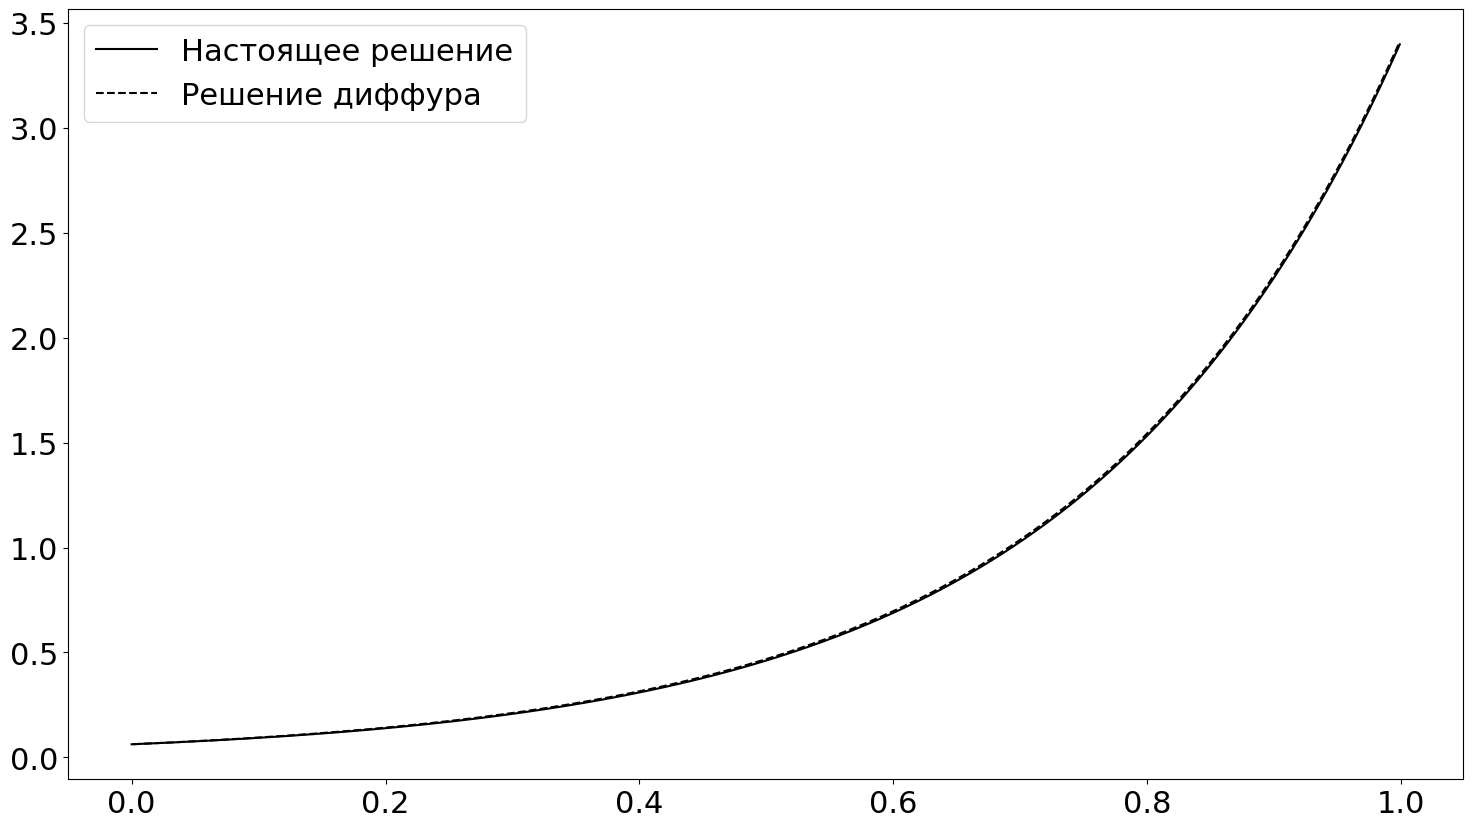

In [6]:
def f(x): 
    return np.exp(4.0*x)
def g(x):
    return np.exp(4.0*x)/16.0
left = 1.0/16.0
right = np.exp(4)/16.0
h = 0.001
h_array = np.arange(0.,1.0,h)
result = solve_reverse(f ,h_array,h ,left , right)

real_solve = g(h_array)

plt.figure(figsize=(18, 10))

plt.plot(h_array,real_solve , 'k-', ms=16, label='Настоящее решение')
plt.plot(h_array[1:-1],result , 'k--', ms=16, label='Решение диффура')

plt.legend()
plt.show()